In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
import keras

import utils.reader as reader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib

from sklearn.model_selection import train_test_split

In [11]:
x_train, y_train = reader.load_mnist('data/fashion', kind='train')
x_test, y_test = reader.load_mnist('data/fashion', kind='t10k')

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
# split the training data into train and validate arrays

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

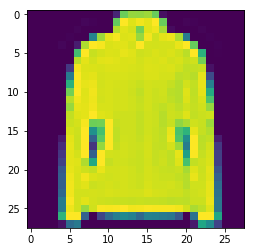

In [13]:
image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [14]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28,28,1))

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [15]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
          MaxPooling2D(pool_size=2),
          Dropout(0.2),
          Flatten(),
          Dense(32, activation='relu'),
          Dense(10, activation='softmax')
           ])


In [16]:
# tensorboard = TensorBoard(
#     log_dir=r'logs\{}'.format('cnn_llayer'),
#     write_graph=True,
#     write_grads=True,
#     histogram_freq=1,
#     write_images=True)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy'])

In [17]:
model_history = cnn_model.fit(
    x_train, y_train, 
    epochs=10, verbose=1, 
    batch_size=512,
    validation_data=(x_validate,y_validate),
#     callbacks=[tensorboard]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 275us/step - loss: 6.7384 - acc: 0.5470 - val_loss: 4.0768 - val_acc: 0.5492
Epoch 2/10
48000/48000 [==============================] - 12s 255us/step - loss: 0.9356 - acc: 0.7274 - val_loss: 0.5012 - val_acc: 0.8167
Epoch 3/10
48000/48000 [==============================] - 12s 254us/step - loss: 0.4459 - acc: 0.8389 - val_loss: 0.3854 - val_acc: 0.8707
Epoch 4/10
48000/48000 [==============================] - 12s 255us/step - loss: 0.3634 - acc: 0.8664 - val_loss: 0.3463 - val_acc: 0.8830
Epoch 5/10
48000/48000 [==============================] - 12s 254us/step - loss: 0.3191 - acc: 0.8807 - val_loss: 0.3266 - val_acc: 0.8859
Epoch 6/10
48000/48000 [==============================] - 12s 254us/step - loss: 0.2936 - acc: 0.8878 - val_loss: 0.3104 - val_acc: 0.8961
Epoch 7/10
48000/48000 [==============================] - 12s 254us/step - loss: 0.2684 - acc: 0.8979 - val_loss: 0.

In [19]:
# joblib.dump(cnn_model, 'keras.pkl')

In [22]:
print(model_history)

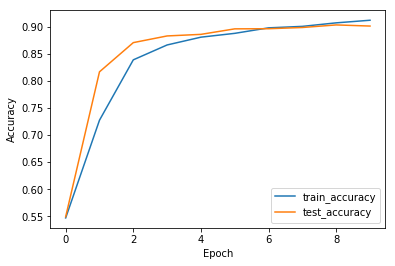

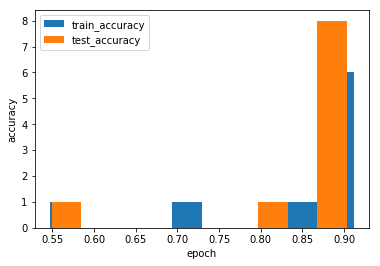

Test Loss: 0.3309
Test Accuracy: 0.8897


In [24]:
def display_history(model_history):
    plt.plot(model_history.history['acc'])
    plt.plot(model_history.history['val_acc'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()
    
def display_histogram(model_history):
    plt.hist(model_history.history['acc'])
    plt.hist(model_history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

display_history(model_history)
display_histogram(model_history)

score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {:.4f}'.format(score[0]))
print('Test Accuracy: {:.4f}'.format(score[1]))

In [1]:
print(model_history.history['acc'])

NameError: name 'model_history' is not defined